# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/NISCHITHA/Desktop/Data Warehouse/Bike-Sharing-Demand/train.csv")


# Load and Explore the data

In [3]:
df.shape

(10886, 12)

In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# Data Visualization

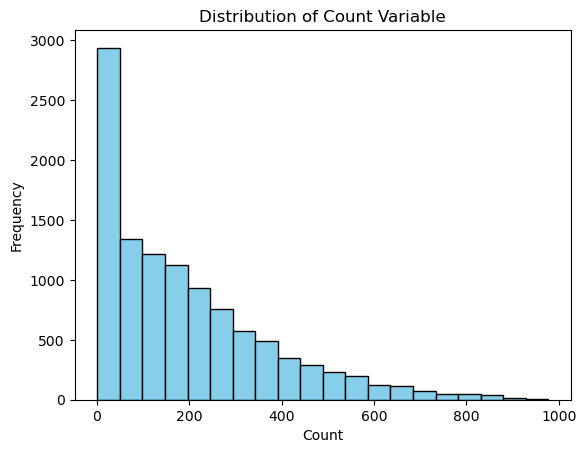

In [8]:
count_data = df['count']

# Create a histogram
plt.hist(count_data, bins=20, color='skyblue', edgecolor='black') 

# Add labels and a title
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of Count Variable')

# Show the histogram
plt.show()

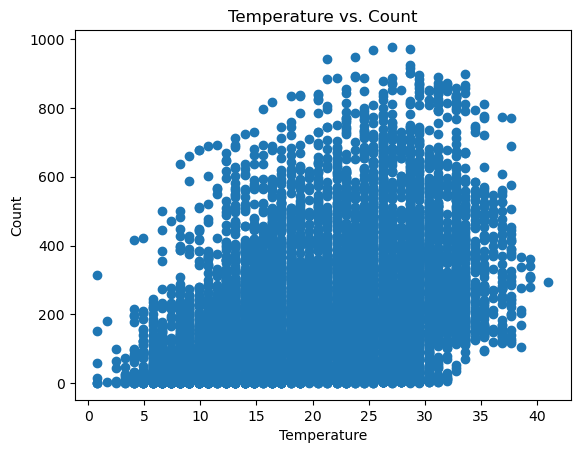

In [9]:
# Create a scatter plot
plt.scatter(df['temp'], df['count'])
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.title('Temperature vs. Count')
plt.show()

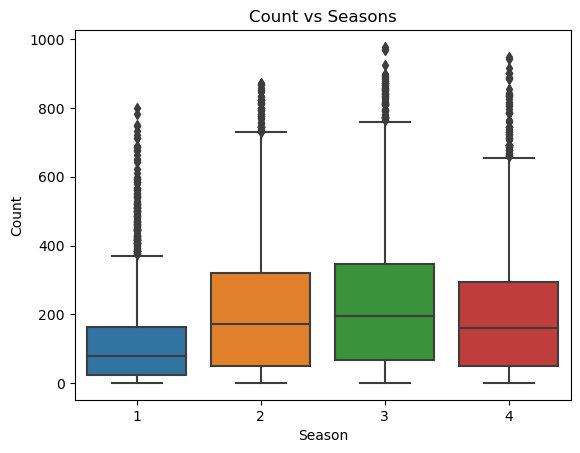

In [10]:
# Create a box plot
sns.boxplot(x='season', y='count', data=df)
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count vs Seasons')
plt.show()

C:\Users\NISCHITHA\AppData\Local\Temp\ipykernel_18780\2168310766.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='holiday', y='count', data=df, ci=None)


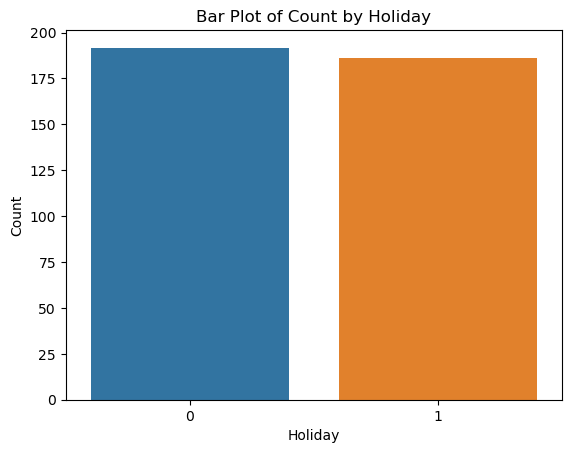

In [11]:
# Create a bar plot
sns.barplot(x='holiday', y='count', data=df, ci=None)

# Add labels and title
plt.xlabel('Holiday')
plt.ylabel('Count')
plt.title('Bar Plot of Count by Holiday')

# Show the plot
plt.show()

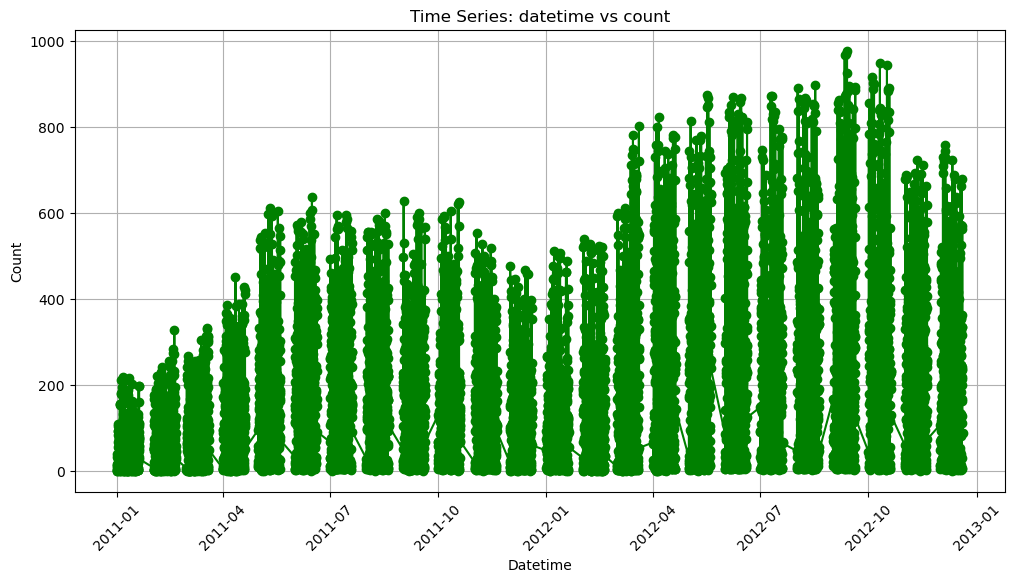

In [12]:
df['datetime']=pd.to_datetime(df['datetime']) # convert 'datetime' coilumn to datetime data type
#line plot for datatime vs count
plt.figure(figsize=(12,6))
plt.plot(df['datetime'], df['count'], marker='o', linestyle='-', color='green')
plt.title('Time Series: datetime vs count')
plt.xlabel('Datetime')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

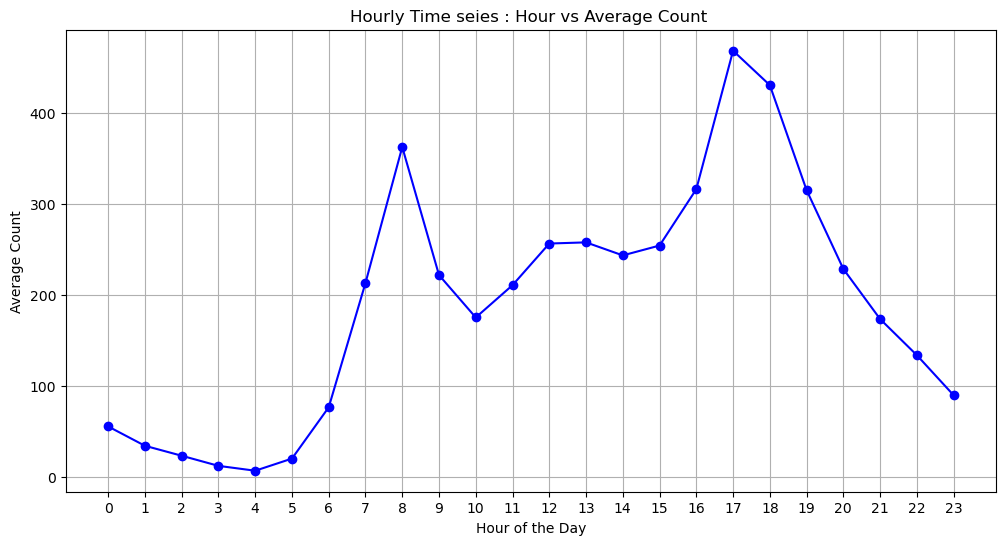

In [13]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour


hourly_count = df.groupby('hour')['count'].mean()


plt.figure(figsize=(12,6))
plt.plot(hourly_count.index, hourly_count.values, marker='o', linestyle='-', color='blue')
plt.title('Hourly Time seies : Hour vs Average Count ')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')
plt.grid(True)
plt.xticks(range(24))
plt.show()

# Time Series Analysis

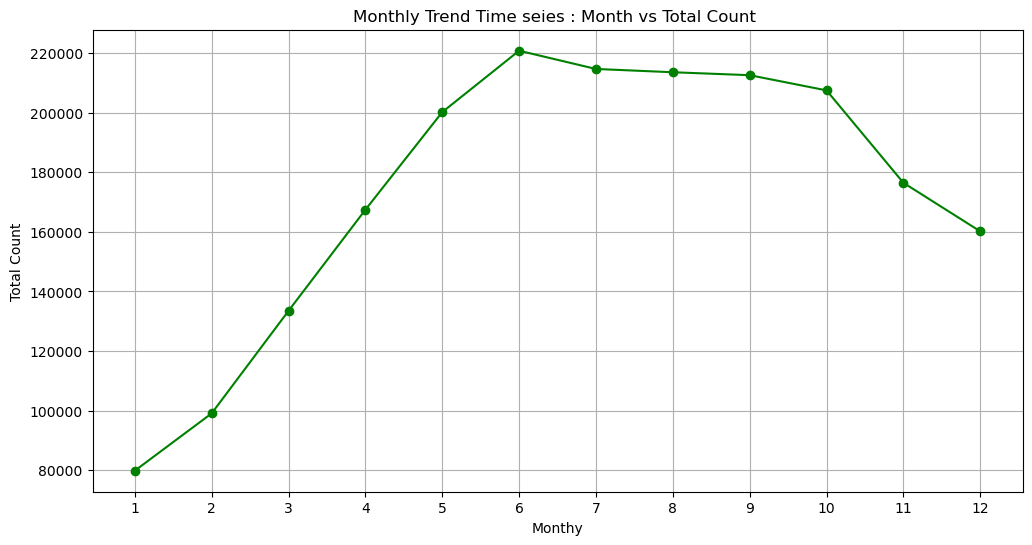

In [14]:
df['month'] = df['datetime'].dt.month


monthly_count = df.groupby('month')['count'].sum()


plt.figure(figsize=(12,6))
plt.plot(monthly_count.index, monthly_count.values, marker='o', linestyle='-', color='green')
plt.title('Monthly Trend Time seies : Month vs Total Count ')
plt.xlabel('Monthy')
plt.ylabel('Total Count')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()

# Categorical Data Analysis

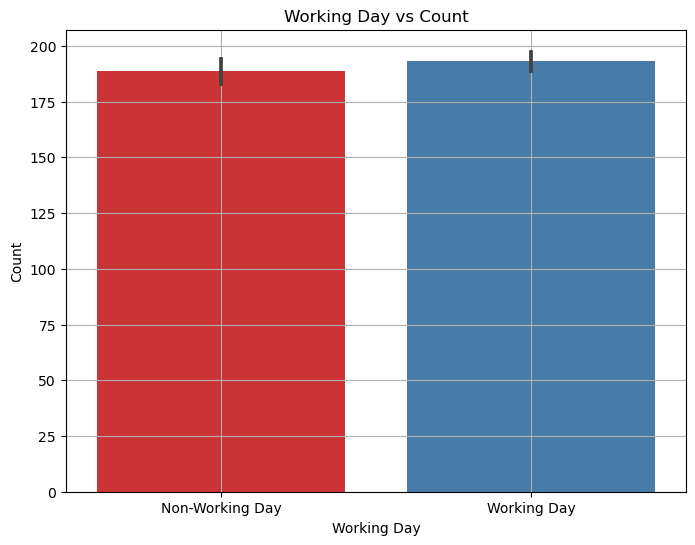

In [15]:
plt.figure(figsize=(8, 6))

# Create a bar plot
sns.barplot(x='workingday', y='count', data=df, palette='Set1')
plt.title('Working Day vs Count')
plt.xlabel('Working Day')
plt.ylabel('Count')

plt.grid(True)
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.show()

# Feature Engineering
    1. Extract hour,month,day,hour
    2. Categorical columns
    3. transform about count variable
    4. Drop Unnecesary Columns


In [16]:
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year


print(df.head())

             datetime  season  holiday  workingday  weather  temp   atemp  \
0 2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1 2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2 2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3 2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4 2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  hour  month  day  year  
0        81        0.0       3          13     16     0      1    1  2011  
1        80        0.0       8          32     40     1      1    1  2011  
2        80        0.0       5          27     32     2      1    1  2011  
3        75        0.0       3          10     13     3      1    1  2011  
4        75        0.0       0           1      1     4      1    1  2011  


In [17]:
df_encoded = pd.get_dummies(df,columns=['season','holiday','workingday','weather'], drop_first=True)
print(df_encoded.head())

             datetime  temp   atemp  humidity  windspeed  casual  registered  \
0 2011-01-01 00:00:00  9.84  14.395        81        0.0       3          13   
1 2011-01-01 01:00:00  9.02  13.635        80        0.0       8          32   
2 2011-01-01 02:00:00  9.02  13.635        80        0.0       5          27   
3 2011-01-01 03:00:00  9.84  14.395        75        0.0       3          10   
4 2011-01-01 04:00:00  9.84  14.395        75        0.0       0           1   

   count  hour  month  day  year  season_2  season_3  season_4  holiday_1  \
0     16     0      1    1  2011         0         0         0          0   
1     40     1      1    1  2011         0         0         0          0   
2     32     2      1    1  2011         0         0         0          0   
3     13     3      1    1  2011         0         0         0          0   
4      1     4      1    1  2011         0         0         0          0   

   workingday_1  weather_2  weather_3  weather_4  
0    

In [18]:
columns_to_drop = ['datetime','casual','registered'] # list the columns to drop

#drop the specified columns
df_encoded = df_encoded.drop(columns=columns_to_drop)

#display the updated Dataframe
print(df_encoded.head())

   temp   atemp  humidity  windspeed  count  hour  month  day  year  season_2  \
0  9.84  14.395        81        0.0     16     0      1    1  2011         0   
1  9.02  13.635        80        0.0     40     1      1    1  2011         0   
2  9.02  13.635        80        0.0     32     2      1    1  2011         0   
3  9.84  14.395        75        0.0     13     3      1    1  2011         0   
4  9.84  14.395        75        0.0      1     4      1    1  2011         0   

   season_3  season_4  holiday_1  workingday_1  weather_2  weather_3  \
0         0         0          0             0          0          0   
1         0         0          0             0          0          0   
2         0         0          0             0          0          0   
3         0         0          0             0          0          0   
4         0         0          0             0          0          0   

   weather_4  
0          0  
1          0  
2          0  
3          0  
4    

In [19]:
df_encoded['transform_count'] = np.log1p(df_encoded['count']) # apply the natural logarithm transformation to the 'count' column

print(df_encoded.head())

   temp   atemp  humidity  windspeed  count  hour  month  day  year  season_2  \
0  9.84  14.395        81        0.0     16     0      1    1  2011         0   
1  9.02  13.635        80        0.0     40     1      1    1  2011         0   
2  9.02  13.635        80        0.0     32     2      1    1  2011         0   
3  9.84  14.395        75        0.0     13     3      1    1  2011         0   
4  9.84  14.395        75        0.0      1     4      1    1  2011         0   

   season_3  season_4  holiday_1  workingday_1  weather_2  weather_3  \
0         0         0          0             0          0          0   
1         0         0          0             0          0          0   
2         0         0          0             0          0          0   
3         0         0          0             0          0          0   
4         0         0          0             0          0          0   

   weather_4  transform_count  
0          0         2.833213  
1          0    

# Model training and validation (split training and test data into 70-30)

In [20]:
from sklearn.model_selection import train_test_split

x = df_encoded.drop(columns=['count','transform_count'])
y = df_encoded['transform_count']

x_train, x_test,y_train , y_test = train_test_split(x,y , test_size=0.3 , random_state=42)

print("x_train shape:" , x_train.shape)
print("x_test shape:" , x_test.shape)
print("y_train shape:" , y_train.shape)
print("y_test shape:" , y_test.shape)

x_train shape: (7620, 16)
x_test shape: (3266, 16)
y_train shape: (7620,)
y_test shape: (3266,)


In [21]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [22]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'learning_rate' : [0.01,0.1,0.2],'n_estimators':[100,200,300],
    'max_depth': [3,4,5],
}
xgb_reg = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train,y_train)
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("best_estimator:" ,best_estimator)
final_xgb_model = xgb.XGBRegressor(**best_params)
final_xgb_model.fit(x_train,y_train)

best_estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model  Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
y_pred = final_xgb_model.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"R-Squared: {r2}")

Mean Squared Error: 0.093999771775137
Mean absolute Error: 0.21039322818513212
R-Squared: 0.9527589125604485


In [26]:
print("best_estimator:" , best_params)

best_estimator: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


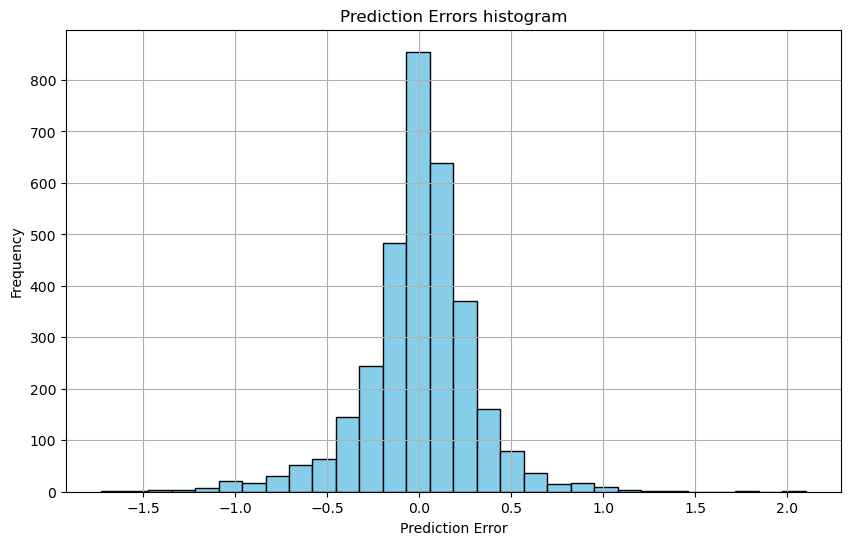

In [27]:
prediction_errors = y_test - y_pred
plt.figure(figsize=(10,6))
plt.hist(prediction_errors, bins=30, color='skyblue',edgecolor='black')
plt.title('Prediction Errors histogram')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Cross-Validation

In [28]:
from sklearn.model_selection import cross_val_score, KFold

xgb_reg = final_xgb_model
k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)

cv_scores = cross_val_score(xgb_reg,x_train , y_train, cv=kf,scoring='r2')

mean_r2 = np.mean(cv_scores)
std_r2 = np.std(cv_scores)

print("Cross-Validation R-squared Scores:")
print(cv_scores)
print(f"Mean R-squared: {mean_r2:.4f}")
print(f"Standard Deviation of R-squared: {std_r2:.4f}")

Cross-Validation R-squared Scores:
[0.95956823 0.95621923 0.95284726 0.95736897 0.94753805 0.95614896
 0.95766293 0.94399682 0.948054   0.95492076]
Mean R-squared: 0.9534
Standard Deviation of R-squared: 0.0049
